# Exercise 2
Random Graphs, Regular Graphs and Small World Networks

## Study the properties of a random graph (1.5 hours).
a. Implement a Python routine L_C_Random that returns the average value of the coefficients C (clustering coefficient ) and L (characteristic path) and the order of the largest connected component of a set of n_graph random graphs of n nodes and probability p . The format of the function must be
[ l, c , tam ] = L_C_Aleatorio ( n_graph, n, p )

In [13]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

In [216]:
def get_graph_metrics(graph):
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()
    
def l_c_random(n_graph, n, p):
    acum_c = 0
    acum_l = 0
    acum_o = 0
    for i in range(0, n_graph):
        graph = nx.gnp_random_graph(n, p)
        c, l, o = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
        acum_o += o
    return [acum_c/n_graph, acum_l/n_graph, acum_o/n_graph]

metrics = l_c_random(2, 100, 0.02)
print(metrics)

[0.024499999999999997, 5.939767928559009, 76.0]


b. Use the previous routine, to plot the behavior of L, C and the order of the largest
connected component for different values of the probability p and a fixed number of
nodes.
Use n = 800 , n_graph = 100 and the following values of p

$[0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]$

In some cases it may happen that L take the value infinite (assign them the same value as
the maximum) What happens in the graph for what L take that value?

In [4]:
c_metrics = []
l_metrics = []
o_metrics = []
n_graph = 100
n = 800

p_set = [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
for p in p_set:
    print("Running", p)
    [c, l, o] = l_c_random(n_graph, n, p)
    c_metrics.append(c)
    l_metrics.append(l)
    o_metrics.append(o)
    
print(c_metrics)
print(l_metrics)
print(o_metrics)

# Serialize and dump results as backup

binary_file = open('c_metrics.bin',mode='wb')
pickle.dump(c_metrics, binary_file)
binary_file.close()

binary_file = open('l_metrics.bin',mode='wb')
pickle.dump(l_metrics, binary_file)
binary_file.close()

binary_file = open('o_metrics.bin',mode='wb')
pickle.dump(o_metrics, binary_file)
binary_file.close()

Running 0
Running 0.0001
Running 0.0003
Running 0.0006
Running 0.001
Running 0.003
Running 0.006
Running 0.01
Running 0.03
Running 0.06
Running 0.1
Running 0.3
Running 0.6
Running 1.0
[0.0, 0.0, 0.0, 3.75e-05, 0.00011666666666666665, 0.002045951479076479, 0.00586383288280347, 0.009689305543387596, 0.02966525792587014, 0.05936722235594138, 0.09901122358460329, 0.29710067677141755, 0.5938933809886913, 0.99]
[0.0, 1.334999999999999, 1.888515873015873, 3.002485887830778, 5.501815464018222, 7.214462937083598, 4.3866143473518475, 3.413741711625743, 2.4184853566958706, 1.9727301627033782, 1.8813282227784724, 1.682917083854819, 1.386102315394243, 0.99]
[0.99, 3.03, 5.16, 10.18, 28.28, 694.63, 785.12, 791.83, 792.0, 792.0, 792.0, 792.0, 792.0, 792.0]


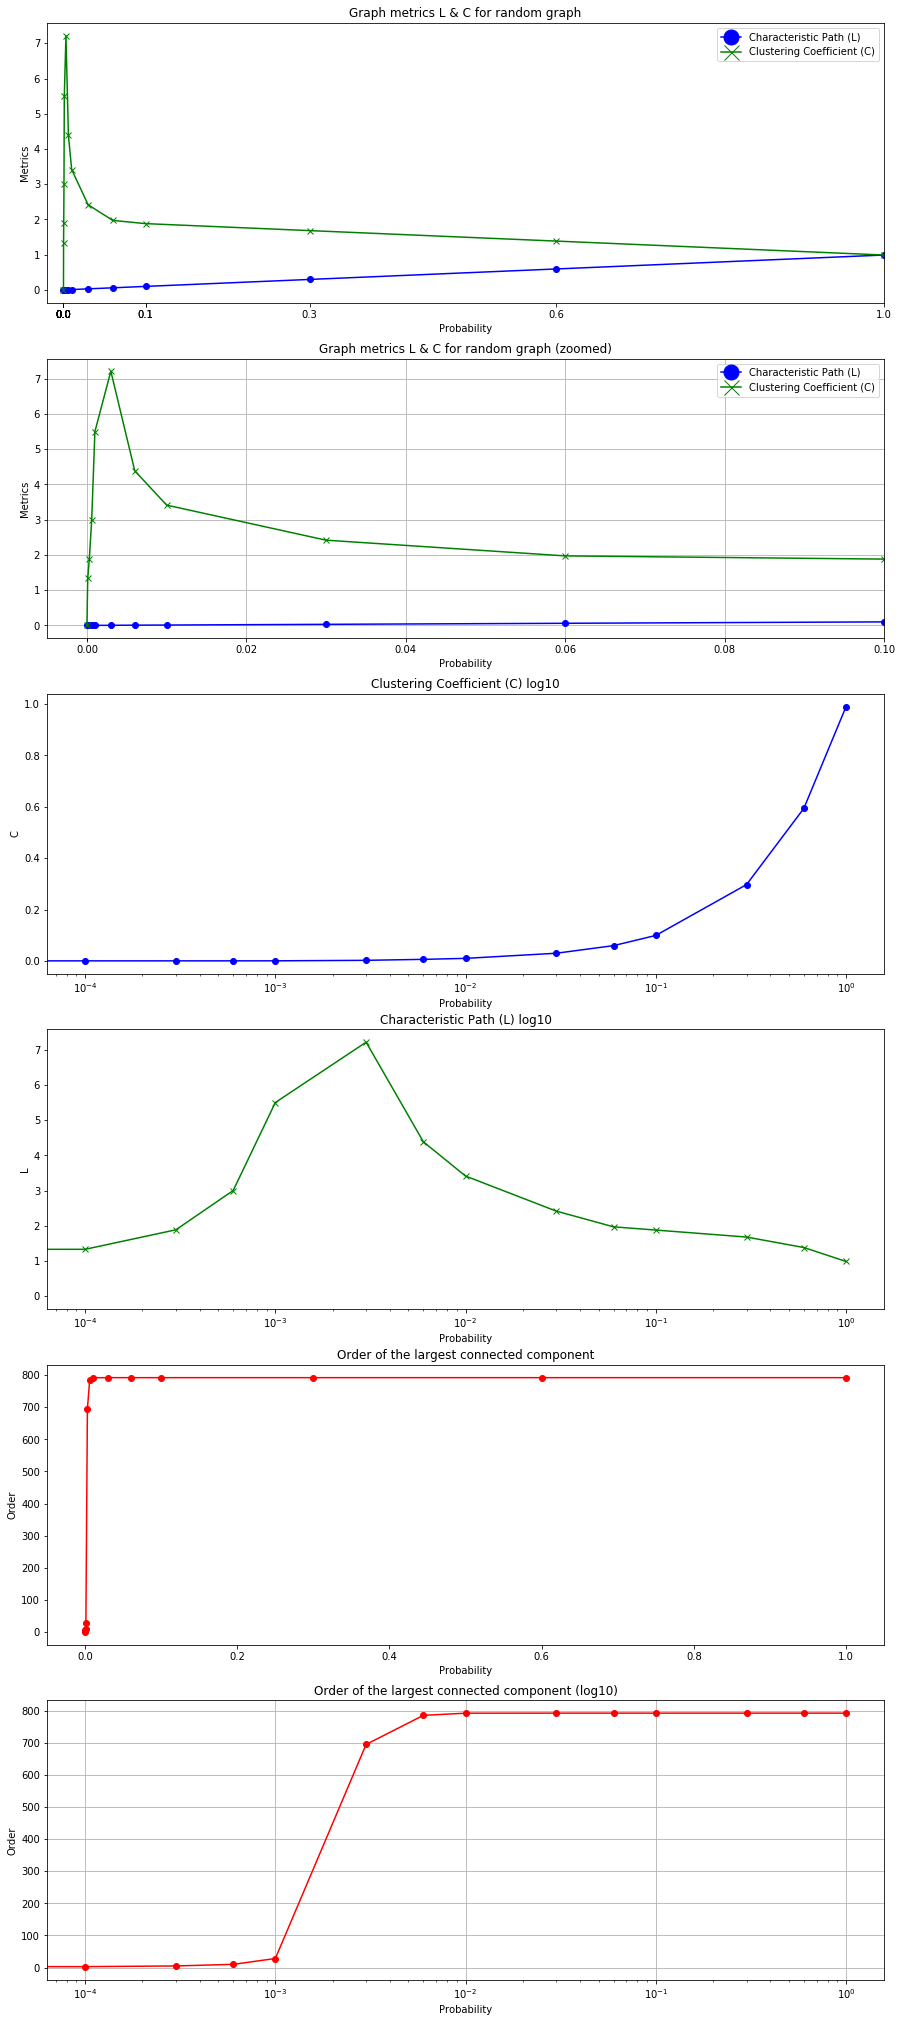

In [288]:
p_set = [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
# Deserialize
binary_file = open('c_metrics.bin',mode='rb')
c_metrics_new = pickle.load(binary_file)
binary_file.close()

binary_file = open('l_metrics.bin',mode='rb')
l_metrics_new = pickle.load(binary_file)
binary_file.close()

binary_file = open('o_metrics.bin',mode='rb')
o_metrics_new = pickle.load(binary_file)
binary_file.close()

f, (plot1, plot2, plot3, plot4, plot5, plot6) = plt.subplots(6, 1, figsize=(15, 36))
plot1.set_title("Graph metrics L & C for random graph")
line1, = plot1.plot(p_set, c_metrics_new, 'o-', color="blue")
line2, = plot1.plot(p_set, l_metrics_new, 'x-', color="green")
plot1.set_xlabel('Probability')
plot1.set_xticks(np.round(np.array(c_metrics_new),1))
plot1.set_ylabel('Metrics')
plot1.set_xlim(-0.02,1)
legend_handles = [ mlines.Line2D([], [], color='blue', marker='o', \
                          markersize=15, label='Characteristic Path (L)'), \
                mlines.Line2D([], [], color='green', marker='x', \
                          markersize=15, label='Clustering Coefficient (C)')]
plot1.legend(handles=legend_handles, loc = 1)
plt.grid()

plot2.set_title("Graph metrics L & C for random graph (zoomed)")
line1, = plot2.plot(p_set, c_metrics_new, 'o-', color="blue")
line2, = plot2.plot(p_set, l_metrics_new, 'x-', color="green")
plot2.set_xlim(-0.005, 0.1)
plot2.set_ylabel('Metrics')
plot2.set_xlabel('Probability')
plot2.grid()
plot2.set_xticks(np.round(np.array(c_metrics_new),1)[:4],10)
plot2.legend(handles=legend_handles, loc = 1)
plt.grid(True)

plot3.set_title("Clustering Coefficient (C) log10")
line1, = plot3.plot(p_set, c_metrics_new, 'o-', color="blue")
plot3.set_ylabel('C')
plot3.set_xlabel('Probability')
plot3.set_xscale("log", nonposx='clip')
plt.grid(True)

plot4.set_title("Characteristic Path (L) log10")
line1, = plot4.plot(p_set, l_metrics_new, 'x-', color="green")
plot4.set_ylabel('L')
plot4.set_xlabel('Probability')
plot4.set_xscale("log", nonposx='clip')
plt.grid(True)

plot5.set_title("Order of the largest connected component")
line1, = plot5.plot(p_set, o_metrics_new, 'o-', color="red")
plot5.set_ylabel('Order')
plot5.set_xlabel('Probability')
plt.grid(True)

plot6.set_title("Order of the largest connected component (log10)")
line1, = plot6.plot(p_set, o_metrics_new, 'o-', color="red")
plot6.set_ylabel('Order')
plot6.set_xlabel('Probability')
plot6.set_xscale("log", nonposx='clip')
plt.grid(True)

plt.show()

### Phase changes
For what probabilities p he produce changes of phase in the behavior the parameters L,
C and order of the largest connected component?

For C about $p=0.01$ where $C$ starts to increase far from 0 region, related to random networks.

For L about $p=0.03$ where $L$ slope begins to decrease

For O about  $p=0.004$


## Regular networks and small world



### One dimensional regular mesh

Implement a Python routine that generates a directed and weighted one dimensional mesh (each branch must take a random value according to a normal $(0,1)$ of $n$ nodes, where each node is connected to its $k$ neighbors left $k/2$ and right $k/2$. 

The format of the routine should be:

```python
G = mesh_1d_directed_weighted(n, k)
```

Constructing a test n = 8, k = 4 graph:

Number of neighbors in each direction 2
<- 1 2
<- 1 3
-> 2 1
<- 2 3
<- 2 4
-> 3 1
-> 3 2
<- 3 4
<- 3 5
-> 4 2
-> 4 3
<- 4 5
<- 4 6
-> 5 3
-> 5 4
<- 5 6
<- 5 7
-> 6 4
-> 6 5
<- 6 7
<- 6 8
-> 7 5
-> 7 6
<- 7 8
-> 8 6
-> 8 7

Edges
(1, 2, -0.184)
(1, 3, 0.033)
(2, 1, 0.699)
(2, 3, -0.096)
(2, 4, 1.414)
(3, 1, -1.533)
(3, 2, 0.271)
(3, 4, -1.206)
(3, 5, -0.053)
(4, 2, -0.290)
(4, 3, -0.293)
(4, 5, -2.107)
(4, 6, 0.085)
(5, 3, 0.627)
(5, 4, 1.679)
(5, 6, 0.834)
(5, 7, -2.315)
(6, 4, -1.225)
(6, 5, 0.942)
(6, 7, -1.059)
(6, 8, 0.203)
(7, 5, -1.495)
(7, 6, 0.783)
(7, 8, 1.173)
(8, 6, 0.271)
(8, 7, 0.269)


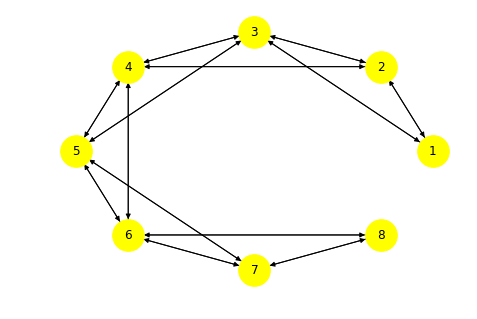

In [248]:
import random

def mesh_1d_directed_weighted(n=10, k=2, seed=0, verbose=False):
    """
    """
    assert n >= 2, "Minimun number of nodes must be 2"
    assert k >= 2, "Minimun number of neighbors must be 2"
    random.seed(seed)
    g = nx.DiGraph()
    step = int(k/2)
    i = 1
    if verbose: print("Number of neighbors in each direction", step)
    while (i <= n):
        for j in range(max(1, i - step), i):
            if verbose: print("->",i,j)
            g.add_weighted_edges_from([(i, j, random.normalvariate(0,1))])
        for j in range(i + 1, min(n, i + step) + 1):
            if verbose: print("<-",i,j)
            g.add_weighted_edges_from([(i, j, random.normalvariate(0,1))])
        i += 1
    return g

print("Constructing a test n = 8, k = 4 graph:")
print()
g = mesh_1d_directed_weighted(8, 4, seed=0, verbose=True)
#nx.draw_kamada_kawai(g, with_labels = True, node_color = "yellow", node_size = 1000)
nx.draw_circular(g, with_labels = True, node_color = "yellow", node_size = 1000)
print()
print("Edges")
for (u, v, wt) in g.edges.data('weight'):
    print('(%d, %d, %.3f)' % (u, v, wt))

Another plot:


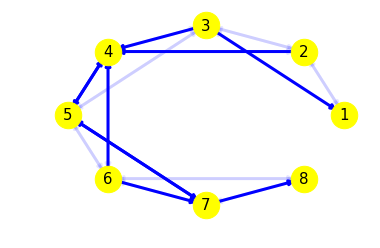

In [262]:
print("Another plot with weight rendering:")

elarge = [(u, v) for (u, v, d) in g.edges(data=True) if abs(d['weight']) > 1.0]
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if abs(d['weight']) <= 1.0]

pos = nx.circular_layout(g)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(g, pos, node_color = "yellow", node_size=700)

# edges
nx.draw_networkx_edges(g, pos, edgelist=elarge, width=3, edge_color='b')
nx.draw_networkx_edges(g, pos, edgelist=esmall, width=3, alpha=0.1, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(g, pos, font_size=15, font_family='sans-serif')

plt.axis('off')
plt.show()

#### C and L for $n=800$ and $k=8$

Calculate the clustering index C and the characteristic path L for a mesh of n = 800
nodes and k = 8 neighbours. Is the clustering index and the characteristic path
comparable to that of a random graph not directed or weighted equivalent?

In [203]:
print("1D mesh")
n = 800
k = 8
g = mesh_1d_directed_weighted(n, k, seed=0, verbose=False)
print("Clustering Index (C)", nx.average_clustering(g))
print("Characteristic Path (L)", nx.average_shortest_path_length(g))
print("Nodes / degree", n/k)
print()
print("Random graph")
g_random = nx.gnm_random_graph(g.order(), g.size())
print("Clustering Index (C)", nx.average_clustering(g_random))
print("Characteristic Path (L)", nx.average_shortest_path_length(g_random))

1D mesh
Clustering Index (C) 0.6449642857142963
Characteristic Path (L) 67.12578222778473
Nodes / degree 100.0

Random graph
Clustering Index (C) 0.019846294424198926
Characteristic Path (L) 2.7103723404255318


For the sparse one-dimensional grids (d = 1) we expect theoretically:
  $$C \sim 0.75$$
  $$L \sim |V|/<k> = 800/8 = 100$$

And we have:
  $$C  = 0.64$$
  $$L = 67 $$

Thus it's verified.

Clustering index, and characteristic path are larger that the ones in random graphs, as theoretically expected.

### Small World graphs
Using the NetworkX function *watts_strogatz_ graph(n,k,p)* implement a
Python routine *l_c_small_world(n_graph , n, k, p)* that returns the average value
of the coefficients $C$ ( average clustering index ) and $L$ (characteristic path) for a set
of *n_graph* small world graphs. 

The format of the function must be:
```python
[l, c] = l_c_small_world(n_graph,n ,k ,p)
```

In [275]:
def l_c_small_world(n_graph, n, k, p, seed=0):
    """
    """
    acum_c = 0
    acum_l = 0
    for i in range(0, n_graph):
        graph = nx.watts_strogatz_graph(n, k, p, seed)
        c, l, _ = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
    return [acum_c/n_graph, acum_l/n_graph]

metrics = l_c_small_world(1, 800, 8, 0.000001)
print(metrics)

[0.6428571428571535, 50.43804755944931]



c. Using the above routine, generate a graph with the behaviour of C and L for
different values of probability p and a fixed number of nodes and branches.
Take N = 800, k = 8 and the following p values:

$[0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]$

In [240]:
c_metrics = []
l_metrics = []
n_graph = 100
n = 800
k = 8

p_set = [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
for p in p_set:
    print("Running", p)
    [c, l] = l_c_small_world(n_graph, n, k, p)
    c_metrics.append(c)
    l_metrics.append(l)
    
print(c_metrics)
print(l_metrics)

# Serialize and dump results as backup

binary_file = open('c_metrics_smallworld.bin',mode='wb')
pickle.dump(c_metrics, binary_file)
binary_file.close()

binary_file = open('l_metrics_smallworld.bin',mode='wb')
pickle.dump(l_metrics, binary_file)
binary_file.close()

Running 0
Running 0.0001
Running 0.0003
Running 0.0006
Running 0.001
Running 0.003
Running 0.006
Running 0.01
Running 0.03
Running 0.06
Running 0.1
Running 0.3
Running 0.6
Running 1.0
[0.6428571428571531, 0.6428571428571531, 0.6408928571428665, 0.6408928571428665, 0.6405357142857251, 0.6340079365079472, 0.6277281746031793, 0.6183075396825455, 0.5859037698412733, 0.539851731601731, 0.4740398629148638, 0.22923820623820648, 0.05095600233100235, 0.006752927627927633]
[50.43804755944929, 50.43804755944929, 29.6006195244055, 29.6006195244055, 28.17185231539422, 14.508582603254064, 11.395838548185239, 9.3253629536921, 6.815475594493128, 5.582421777221538, 4.859602628285358, 3.8660951188986172, 3.5204161451814735, 3.4578598247809795]


#### Phase changes

For what probabilities p phase changes occur in behavior parameters L and C?

First, we plot $L$ and $C$ over $p$:

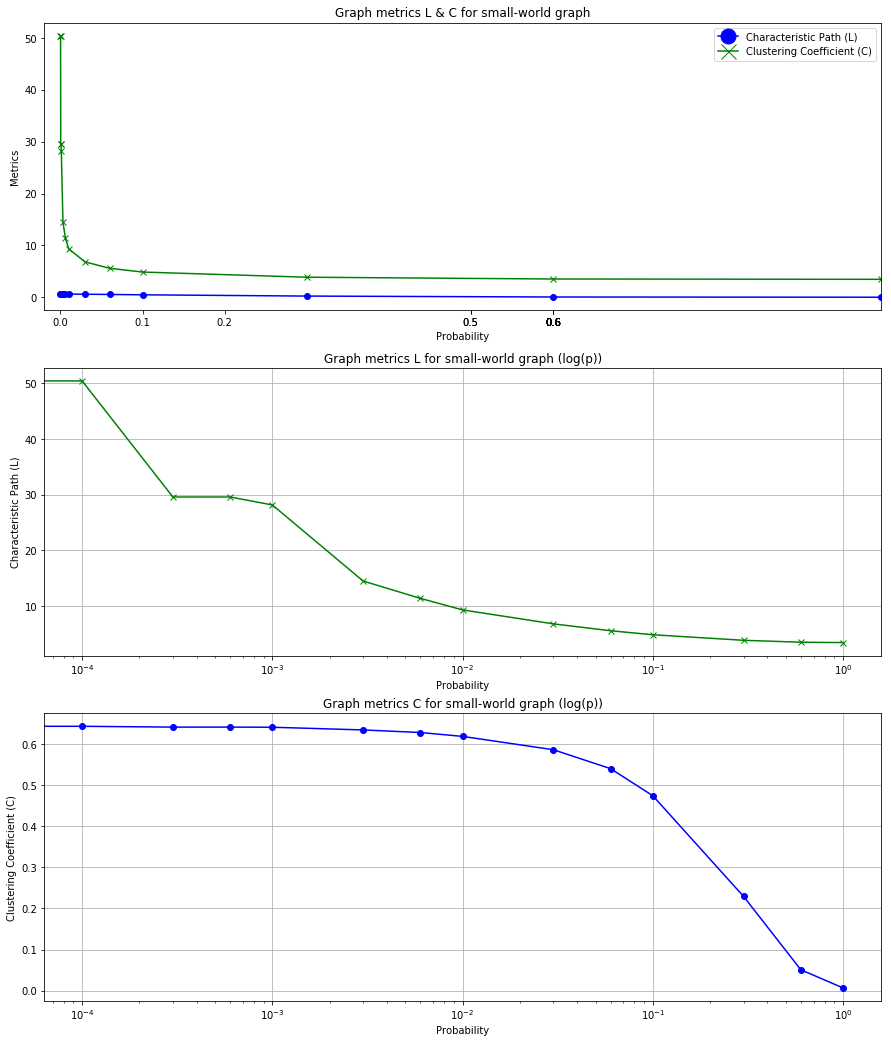

In [271]:
p_set = [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
# Deserialize
binary_file = open('c_metrics_smallworld.bin',mode='rb')
c_metrics_new = pickle.load(binary_file)
binary_file.close()

binary_file = open('l_metrics_smallworld.bin',mode='rb')
l_metrics_new = pickle.load(binary_file)
binary_file.close()

f, (plot1, plot2, plot3) = plt.subplots(3, 1, figsize=(15, 18))
plt.grid(True)
plot1.set_title("Graph metrics L & C for small-world graph")
line1, = plot1.plot(p_set, c_metrics_new, 'o-', color="blue")
line2, = plot1.plot(p_set, l_metrics_new, 'x-', color="green")
plot1.set_xlabel('Probability')
plot1.set_xticks(np.round(np.array(c_metrics_new),1))
plot1.set_ylabel('Metrics')
plot1.set_xlim(-0.02,1)
legend_handles = [ mlines.Line2D([], [], color='blue', marker='o', \
                          markersize=15, label='Characteristic Path (L)'), \
                mlines.Line2D([], [], color='green', marker='x', \
                          markersize=15, label='Clustering Coefficient (C)')]
plot1.legend(handles=legend_handles, loc = 1)

plot2.set_title("Graph metrics L for small-world graph (log(p))")
line2, = plot2.plot(p_set, l_metrics_new, 'x-', color="green")
plot2.set_ylabel('Characteristic Path (L)')
plot2.set_xlabel('Probability')
plot2.grid()
plot2.set_xscale("log", nonposx='clip')
plt.grid(True)

plot3.set_title("Graph metrics C for small-world graph (log(p))")
line1, = plot3.plot(p_set, c_metrics_new, 'o-', color="blue")
plot3.set_ylabel('Clustering Coefficient (C)')
plot3.set_xlabel('Probability')
plot3.grid()
plt.grid(True)
plot3.set_xscale("log", nonposx='clip')

plt.show()

We saw a phase change in $L$ around $p = 0.0001$. At this point, L begins to decrease as we see if we plot the probability in $log_{10}$ scale.

In C we observe a change in behavior from higher $p$. Around $p=0.06$ there is a change in slope as we see if we plot the probability in $log_{10}$ scale.

The change theoretically expected for $p$ is $1/kN = 1/(8*800) = 0.00016$, very similar to the one that we have obtained.

#### Small world zone
Between what values of p you would say that there is the Small-World zone for these
values of N and k. Does the p value observed correspond to the theoretical p value for
the phase change in the behavior of the characteristic path?

The graph is in small world zone if L is similar to L in random networks an C similar to C in regular networks. 

So, the graph enters in a L-random zone around $p>0.03$ where $L<6$.
and the graph remains in a C regular zone for all values of p, where C is significantly higher than 0.

Thus, the small-world zone seems to be the interval of $p$ $(0.03, 1.0)$.

The start point is similar to the phase change of clustering index, biased by our own approaches.

#### Small world vs biological network
Compare the graphs obtained from C and L with the corresponding theoretical graphs.
With the data you obtained in exercise 1. Would you say that the protein interaction
network of Caernobidis Elegans could be considered a small world network (Reason the
answer)?

The graphs, in their log versions correspond to theoretical graphs.

The *C. Elegans* network has $C$ significantly higher than $C$ in random networks ($C=0$), and of the same amount that C in our small-world region.

Also, the value of L small, similar to random, confirms that *C. Elegans* network is a small-world one.